# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Build query URL
query_url = f"{url}&APPID={weather_api_key}"

# Set up empty lists to hold data from call

city_name = []
country = []
lat = []
lng = []
date = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

# Setting the beginning of the loop

count = 1

# Start loop statement

print(f"Beginning Data Retrieval")
print(f"-----------------------")

# Initialize loop

for city in cities:
    
    try:
        response = requests.get(f"{query_url}&q={city}").json()
    
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
    
        wind_speed.append(response["wind"]["speed"])
        
        current_city = response["name"]
        
        # Include a print log of each city as its being processed
        print(f"Processing Record {count} | {current_city}")
        
        count = count + 1 
    
    except:
        print("No city found...")
    continue
 
# End of loop statement
print("----------------------")
print("Ending Data Retrieval")

Beginning Data Retrieval
-----------------------
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...

No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found...
No city found.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create dictionary with weather city data

weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longtitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date
}

# Convert dictionary to dataframe

weatherpy_data = pd.DataFrame(weather_dict)

weatherpy_data.to_csv('output_data/cities.csv')

weatherpy_data.head()

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [10]:
# Display dataframe stats with describe function

weatherpy_data.describe()

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weatherpy_data = weatherpy_data[weatherpy_data["Humidity"] <= 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

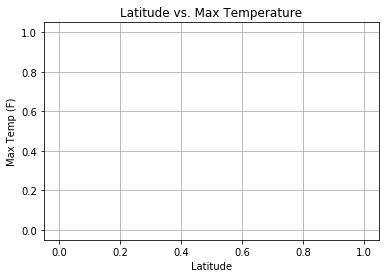

In [12]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latmaxtemp.png")

plt.show()

## Latitude vs. Humidity Plot

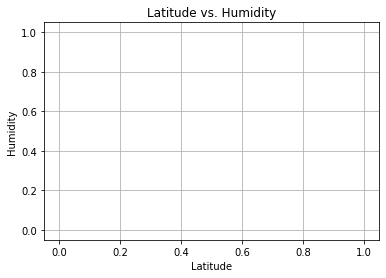

In [13]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/lathumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

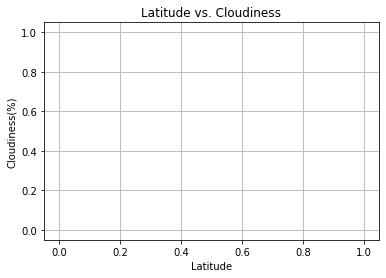

In [14]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Cloudiness']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latcloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

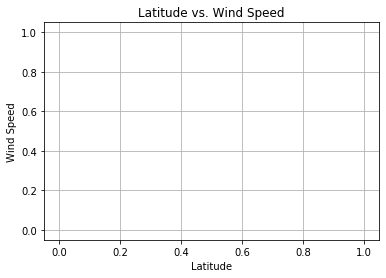

In [15]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latwindspeed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
#x_valuesn = weatherpy_data[['Latitude'] > 0]
x_values = weatherpy_data[['Latitude'] > 0]
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_north.png")

plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_south.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_north.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_south.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_north.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_south.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_north.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_south.png")

plt.show()